In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sncosmo
import emcee
from multiprocessing import Pool
import glob
import quadpy
from matplotlib.offsetbox import AnchoredText
import getdist
from getdist import plots, MCSamples
import seaborn as sns
from scipy import stats

sns.set_style("whitegrid", {'axes.grid':'False','xtick.bottom': True,'ytick.left': True})

params = {"text.usetex" : True,'font.size': 20, 'font.family':'serif', 'font.serif':'Computer Modern'}
plt.rcParams.update(params)

gk = quadpy.c1.gauss_kronrod(40)

In [2]:
flat_samples_exp=[]
for j in range(18):
    flat_samples_exp.append(np.loadtxt("./chains_evol_w_z_FA_quartimax/chain_int"+str(j)+"_FA_quartimax.txt"))

In [3]:
z_values=np.array([0.017523178540464996,0.029395989765539997,0.04496184698853182,0.08646423246338446,
0.126677225,0.15342328947368422,0.18035045454545454,0.20362436585365853,0.23125819047619045,
0.2558961777777778,0.28438252499999994,0.31656785714285723,0.35527217073170725,0.411815,
0.49531707317073187,0.5969813953488374,0.7421124999999998,0.9497030303030304])

In [4]:
alpha_values=[]
alpha_error_up=[]
alpha_error_down=[]
beta_values=[]
beta_error_up=[]
beta_error_down=[]
sig_values=[]
sig_error_up=[]
sig_error_down=[]

for j in range(18):
    percentile_alpha=np.percentile(flat_samples_exp[j][:,0],[16,50,84])
    alpha_values.append(percentile_alpha[1]) 
    alpha_error_up.append(np.diff(percentile_alpha)[1])
    alpha_error_down.append(np.diff(percentile_alpha)[0])
    
    percentile_beta=np.percentile(flat_samples_exp[j][:,1],[16,50,84])
    beta_values.append(percentile_beta[1]) 
    beta_error_up.append(np.diff(percentile_beta)[1])
    beta_error_down.append(np.diff(percentile_beta)[0])

    percentile_sig=np.percentile(flat_samples_exp[j][:,2],[16,50,84])
    sig_values.append(percentile_sig[1]) 
    sig_error_up.append(np.diff(percentile_sig)[1])
    sig_error_down.append(np.diff(percentile_sig)[0])

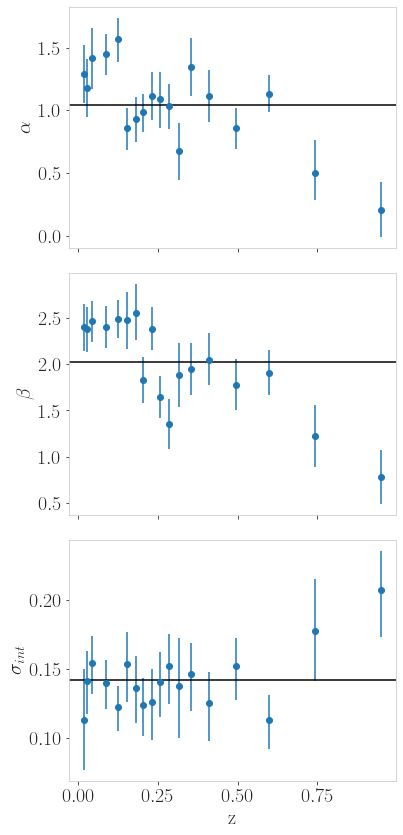

In [5]:
fig, axs= plt.subplots(3,1,figsize=(6,12),sharex=True)

axs[0].errorbar(z_values,alpha_values,yerr=[alpha_error_up,alpha_error_down],ls="none",marker="o",markersize=6)
axs[0].axhline(y=1.0442,c="k")
axs[0].set_ylabel(r"$\alpha$")
axs[1].errorbar(z_values,beta_values,yerr=[beta_error_up,beta_error_down],ls="none",marker="o",markersize=6)
axs[1].axhline(y=2.0297,c="k")
axs[1].set_ylabel(r"$\beta$")
axs[2].errorbar(z_values,sig_values,yerr=[sig_error_up,sig_error_down],ls="none",marker="o",markersize=6,c="C0")
axs[2].axhline(y=0.1419,c="k")
axs[2].set_xlabel("z")
axs[2].set_ylabel(r"$\sigma_{int}$")

plt.tight_layout()
plt.savefig('./parameters_evol_w_z_FA_quartimax.pdf');

In [6]:
labels_gdist = [r"\alpha",r"\beta",r"\sigma_{int}"]
names_gdist = ["a","b","sig"]

In [7]:
samples_exp0 = MCSamples(samples=flat_samples_exp[0], names=names_gdist, labels=labels_gdist)#, label="EXP3 (PCA)")
samples_exp1 = MCSamples(samples=flat_samples_exp[1], names=names_gdist, labels=labels_gdist)#, label="EXP3 (PCA)")
samples_exp2 = MCSamples(samples=flat_samples_exp[2], names=names_gdist, labels=labels_gdist)#, label="EXP3 (PCA)")
samples_exp3 = MCSamples(samples=flat_samples_exp[3], names=names_gdist, labels=labels_gdist)#, label="EXP3 (PCA)")
samples_exp4 = MCSamples(samples=flat_samples_exp[4], names=names_gdist, labels=labels_gdist)#, label="EXP3 (PCA)")
samples_exp5 = MCSamples(samples=flat_samples_exp[5], names=names_gdist, labels=labels_gdist)#, label="EXP3 (PCA)")
samples_exp6 = MCSamples(samples=flat_samples_exp[6], names=names_gdist, labels=labels_gdist)#, label="EXP3 (PCA)")
samples_exp7 = MCSamples(samples=flat_samples_exp[7], names=names_gdist, labels=labels_gdist)#, label="EXP3 (PCA)")
samples_exp8 = MCSamples(samples=flat_samples_exp[8], names=names_gdist, labels=labels_gdist)#, label="EXP3 (PCA)")
samples_exp9 = MCSamples(samples=flat_samples_exp[9], names=names_gdist, labels=labels_gdist)#, label="EXP3 (PCA)")
samples_exp10 = MCSamples(samples=flat_samples_exp[10], names=names_gdist, labels=labels_gdist)#, label="EXP3 (PCA)")
samples_exp11 = MCSamples(samples=flat_samples_exp[11], names=names_gdist, labels=labels_gdist)#, label="EXP3 (PCA)")
samples_exp12 = MCSamples(samples=flat_samples_exp[12], names=names_gdist, labels=labels_gdist)#, label="EXP3 (PCA)")
samples_exp13 = MCSamples(samples=flat_samples_exp[13], names=names_gdist, labels=labels_gdist)#, label="EXP3 (PCA)")

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


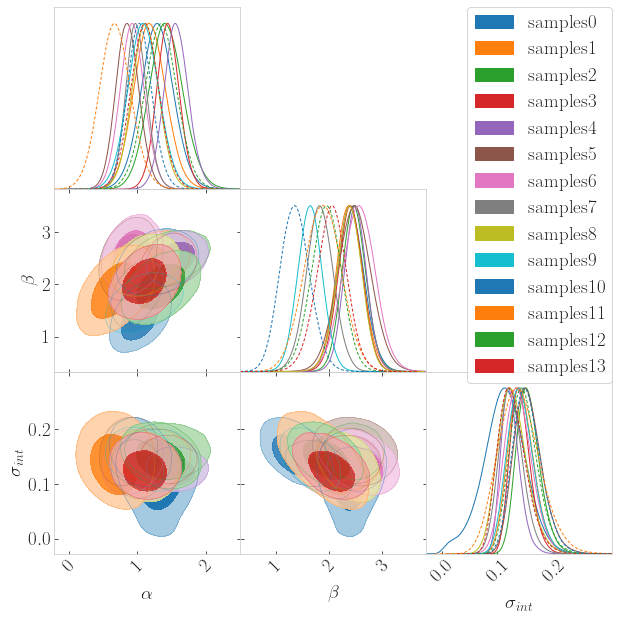

In [8]:
g = plots.get_subplot_plotter(subplot_size=3)
#g.settings.title_limit_fontsize = 13
g.settings.axes_fontsize=20
g.settings.axes_labelsize=20
g.axis_tick_max_labels=10
#g.settings.axis_marker_lw=0.5
g.settings.axis_tick_x_rotation=45
g.settings.legend_fontsize=20
g.triangle_plot([samples_exp0,samples_exp1,samples_exp2,samples_exp3,samples_exp4,
                 samples_exp5,samples_exp6,samples_exp7,samples_exp8,
                 samples_exp9,samples_exp10,samples_exp11,samples_exp12,samples_exp13], filled=True,
                 line_args=[{'lw':1., 'color':'C0'},{'lw':1., 'color':'C1'},{'lw':1., 'color':'C2'},
                          {'lw':1., 'color':'C3'},{'lw':1., 'color':'C4'},{'lw':1., 'color':'C5'},
                          {'lw':1., 'color':'C6'},{'lw':1., 'color':'C7'},{'lw':1., 'color':'C8'},
                          {'lw':1., 'color':'C9'},{'lw':1., 'color':'C0'},{'lw':1., 'color':'C1'},{'lw':1., 'color':'C2'},
                          {'lw':1., 'color':'C3'}],
                 contour_colors=["C0","C1","C2","C3","C4","C5","C6","C7","C8","C9","C0","C1","C2","C3"],
                 contour_ls=["-","-","-","-","-","-","-","-","-","-","--","--","--","--"])
